In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf

In [208]:
df=pd.read_csv("audi.csv")

In [209]:
df.head()
# model,yıl,fiyat,vites,km,yakıt tipi,vergi, mpg,motor boyutu

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [210]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [211]:
df.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10663,False,False,False,False,False,False,False,False,False
10664,False,False,False,False,False,False,False,False,False
10665,False,False,False,False,False,False,False,False,False
10666,False,False,False,False,False,False,False,False,False


In [212]:
df.isnull().sum() # hiç null değer yok

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<AxesSubplot:>

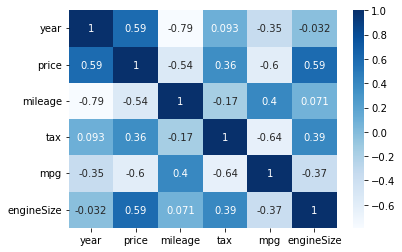

In [214]:
sbn.heatmap(df.corr(),annot=True, cmap='Blues')

In [215]:
df.corr()["price"].sort_values()  # fiyat ile olan korelasyonlar, küçükten büyüğe sırala

mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
year          0.592581
price         1.000000
Name: price, dtype: float64

C:\Users\Onur\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

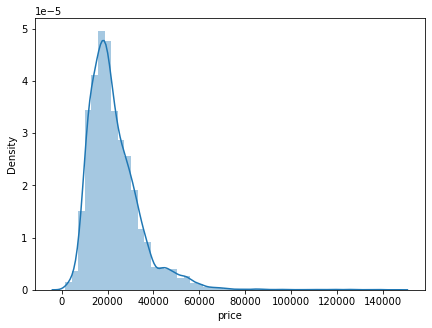

In [216]:
plt.figure(figsize=(7,5)) # grafiği büyütmek için 
sbn.distplot(df["price"])

C:\Users\Onur\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

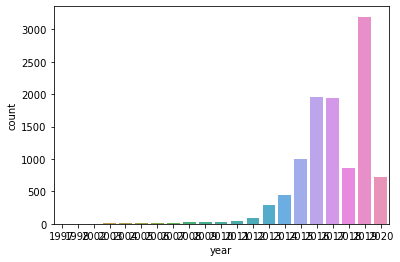

In [217]:
sbn.countplot(df["year"])

<AxesSubplot:xlabel='price', ylabel='Count'>

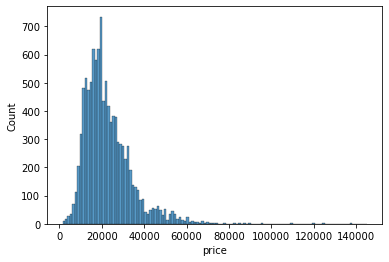

In [218]:
sbn.histplot(df["price"])

In [219]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [220]:
#df[df.mileage != 323000.000000].groupby("year").mean()["price"]

In [221]:
#df=df[df.mileage != 323000.000000] # 1 tane yüksek km vardı onu attık

In [222]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


<AxesSubplot:xlabel='mileage', ylabel='price'>

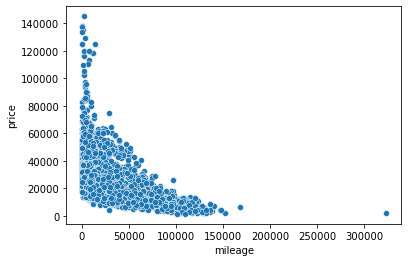

In [223]:
sbn.scatterplot(x= "mileage",y ="price",data=df) # yeni grafik daha düzgün

In [224]:
df=df.drop("transmission",axis=1)

In [225]:
df=df.drop("model",axis=1)
df=df.drop("fuelType",axis=1)

In [226]:
y=df["price"].values # y yi numpy dizisine ekledik
x=df.drop("price",axis=1).values


In [227]:
x

array([[2.0170e+03, 1.5735e+04, 1.5000e+02, 5.5400e+01, 1.4000e+00],
       [2.0160e+03, 3.6203e+04, 2.0000e+01, 6.4200e+01, 2.0000e+00],
       [2.0160e+03, 2.9946e+04, 3.0000e+01, 5.5400e+01, 1.4000e+00],
       ...,
       [2.0200e+03, 6.0900e+02, 1.5000e+02, 4.9600e+01, 1.0000e+00],
       [2.0170e+03, 8.6460e+03, 1.5000e+02, 4.7900e+01, 1.4000e+00],
       [2.0160e+03, 1.1855e+04, 1.5000e+02, 4.7900e+01, 1.4000e+00]])

In [228]:
y

array([12500, 16500, 11000, ..., 17199, 19499, 15999], dtype=int64)

In [229]:
from sklearn.model_selection import train_test_split

In [230]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=12)

In [231]:
len(x_train)

7467

In [232]:
len(x_test)

3201

In [233]:
len(df)

10668

In [234]:
from sklearn.preprocessing import MinMaxScaler

In [235]:
scaler=MinMaxScaler()

In [236]:
x_train=scaler.fit_transform(x_train) # x değerleri skayl ediliyor

In [237]:
x_test=scaler.fit_transform(x_test)

In [238]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [239]:
x_train.shape

(7467, 5)

In [240]:
x_test.shape

(3201, 5)

In [316]:
y_test.shape

(3201,)

In [317]:
y_train.shape

(7467,)

In [318]:
model=Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")



In [319]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 8ms/step - loss: 660944512.0000 - val_loss: 662693120.0000
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 660908480.0000 - val_loss: 662636672.0000
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 660814208.0000 - val_loss: 662483968.0000
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 660563968.0000 - val_loss: 662091200.0000
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 659962432.0000 - val_loss: 661180032.0000
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 658640192.0000 - val_loss: 659243136.0000
Epoch 7/300
30/30 [==============================] - 0s 3ms/step - loss: 655951424.0000 - val_loss: 655454528.0000
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 650869504.0000 - val_loss: 648424896.0000
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 6418146

30/30 [==============================] - 0s 2ms/step - loss: 85006632.0000 - val_loss: 70163624.0000
Epoch 73/300
30/30 [==============================] - 0s 2ms/step - loss: 84163744.0000 - val_loss: 69212288.0000
Epoch 74/300
30/30 [==============================] - 0s 2ms/step - loss: 83309384.0000 - val_loss: 68231968.0000
Epoch 75/300
30/30 [==============================] - 0s 2ms/step - loss: 82422136.0000 - val_loss: 67249976.0000
Epoch 76/300
30/30 [==============================] - 0s 2ms/step - loss: 81540952.0000 - val_loss: 66302876.0000
Epoch 77/300
30/30 [==============================] - 0s 2ms/step - loss: 80652968.0000 - val_loss: 65259052.0000
Epoch 78/300
30/30 [==============================] - 0s 2ms/step - loss: 79711448.0000 - val_loss: 64269148.0000
Epoch 79/300
30/30 [==============================] - 0s 2ms/step - loss: 78762392.0000 - val_loss: 63244380.0000
Epoch 80/300
30/30 [==============================] - 0s 2ms/step - loss: 77813136.0000 - val_loss: 6

30/30 [==============================] - 0s 2ms/step - loss: 24563100.0000 - val_loss: 33211850.0000
Epoch 144/300
30/30 [==============================] - 0s 2ms/step - loss: 24266562.0000 - val_loss: 33312332.0000
Epoch 145/300
30/30 [==============================] - 0s 2ms/step - loss: 23931234.0000 - val_loss: 32385320.0000
Epoch 146/300
30/30 [==============================] - 0s 2ms/step - loss: 23618132.0000 - val_loss: 32840546.0000
Epoch 147/300
30/30 [==============================] - 0s 2ms/step - loss: 23330394.0000 - val_loss: 31989318.0000
Epoch 148/300
30/30 [==============================] - 0s 2ms/step - loss: 23107358.0000 - val_loss: 32365110.0000
Epoch 149/300
30/30 [==============================] - 0s 2ms/step - loss: 22816074.0000 - val_loss: 32426270.0000
Epoch 150/300
30/30 [==============================] - 0s 2ms/step - loss: 22594438.0000 - val_loss: 31981872.0000
Epoch 151/300
30/30 [==============================] - 0s 2ms/step - loss: 22368930.0000 - val

30/30 [==============================] - 0s 2ms/step - loss: 16846516.0000 - val_loss: 33511706.0000
Epoch 215/300
30/30 [==============================] - 0s 2ms/step - loss: 16807480.0000 - val_loss: 33894032.0000
Epoch 216/300
30/30 [==============================] - 0s 2ms/step - loss: 16808880.0000 - val_loss: 33601876.0000
Epoch 217/300
30/30 [==============================] - 0s 2ms/step - loss: 16755966.0000 - val_loss: 33376640.0000
Epoch 218/300
30/30 [==============================] - 0s 2ms/step - loss: 16728877.0000 - val_loss: 33098168.0000
Epoch 219/300
30/30 [==============================] - 0s 2ms/step - loss: 16688652.0000 - val_loss: 33987712.0000
Epoch 220/300
30/30 [==============================] - 0s 2ms/step - loss: 16648028.0000 - val_loss: 33311190.0000
Epoch 221/300
30/30 [==============================] - 0s 2ms/step - loss: 16627320.0000 - val_loss: 33074552.0000
Epoch 222/300
30/30 [==============================] - 0s 2ms/step - loss: 16601226.0000 - val

30/30 [==============================] - 0s 2ms/step - loss: 15229899.0000 - val_loss: 33532938.0000
Epoch 286/300
30/30 [==============================] - 0s 3ms/step - loss: 15211983.0000 - val_loss: 32809778.0000
Epoch 287/300
30/30 [==============================] - 0s 3ms/step - loss: 15208193.0000 - val_loss: 33771484.0000
Epoch 288/300
30/30 [==============================] - 0s 2ms/step - loss: 15181207.0000 - val_loss: 33598404.0000
Epoch 289/300
30/30 [==============================] - 0s 2ms/step - loss: 15168100.0000 - val_loss: 33286998.0000
Epoch 290/300
30/30 [==============================] - 0s 2ms/step - loss: 15145588.0000 - val_loss: 33441116.0000
Epoch 291/300
30/30 [==============================] - 0s 2ms/step - loss: 15131808.0000 - val_loss: 33407880.0000
Epoch 292/300
30/30 [==============================] - 0s 2ms/step - loss: 15122224.0000 - val_loss: 33255618.0000
Epoch 293/300
30/30 [==============================] - 0s 2ms/step - loss: 15108339.0000 - val

In [320]:
lossData=pd.DataFrame(model.history.history)

In [321]:
lossData

,loss,val_loss
0,660944512.0,662693120.0
1,660908480.0,662636672.0
2,660814208.0,662483968.0
3,660563968.0,662091200.0
4,659962432.0,661180032.0
...,...,...
295,15112870.0,33739228.0
296,15077830.0,33013246.0
297,15038532.0,32986138.0
298,15076225.0,32614162.0


<AxesSubplot:>

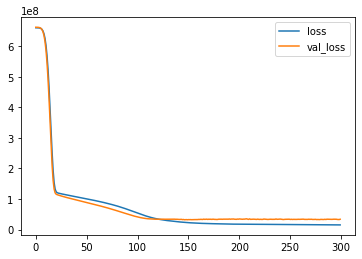

In [322]:
lossData.plot()

In [323]:
from sklearn.metrics import mean_squared_error,mean_absolute_error  # hata kare ve mutlak hata

In [324]:
predictionArray=model.predict(x_test)

In [325]:
predictionArray

array([[ 9250.587],
       [11132.859],
       [59240.715],
       ...,
       [33591.098],
       [13947.448],
       [34988.63 ]], dtype=float32)

In [326]:
mean_absolute_error(y_test,predictionArray)  
# 4000 poundluk bir mutlak hata var bu da % 17 hata demek, geliştirilebilir bir model

4077.881547674616

In [327]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000
